<a href="https://colab.research.google.com/github/LimKyeongmuk/CNN-Architecture/blob/main/Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
import os
import time

In [2]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
y_train.shape

(50000, 1)

In [4]:
num_classes = 10
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [5]:
y_train.shape

(50000, 10)

In [6]:
validation_images, validation_labels = x_train[:500], y_train[:500]
train_images, train_labels = x_train[500:], y_train[500:]

In [7]:
train_images.shape

(49500, 32, 32, 3)

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(32,32,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(4,4)),
    keras.layers.Conv2D(filters=256 , kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384 , kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384 , kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256 , kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096 , activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096 , activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

https://stackoverrun.com/ko/q/11696058

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 96)        2688      
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 96)        384       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 256)         614656    
_________________________________________________________________
batch_normalization_16 (Batc (None, 7, 7, 256)         1024      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 384)        

In [16]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [14]:
train_datagen.fit(train_images)
validation_datagen.fit(validation_images)

https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/

In [15]:
history = model.fit_generator(train_datagen.flow(train_images,train_labels, batch_size = 32), 
                    validation_data = validation_datagen.flow(validation_images, validation_labels, batch_size = 32),
                    epochs = 10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1547/1547 [==============================] - 83s 34ms/step - loss: 1.7074 - accuracy: 0.3941 - val_loss: 2.0726 - val_accuracy: 0.2960
Epoch 2/10
1547/1547 [==============================] - 52s 34ms/step - loss: 1.3929 - accuracy: 0.5191 - val_loss: 1.4651 - val_accuracy: 0.4680
Epoch 3/10
1547/1547 [==============================] - 52s 34ms/step - loss: 1.2417 - accuracy: 0.5754 - val_loss: 1.1328 - val_accuracy: 0.5960
Epoch 4/10
1547/1547 [==============================] - 52s 33ms/step - loss: 1.1289 - accuracy: 0.6177 - val_loss: 1.3197 - val_accuracy: 0.5700
Epoch 5/10
1547/1547 [==============================] - 52s 33ms/step - loss: 1.0419 - accuracy: 0.6487 - val_loss: 0.9632 - val_accuracy: 0.6940
Epoch 6/10
1547/1547 [==============================] - 52s 33ms/step - loss: 0.9690 - accuracy: 0.6757 - val_loss: 0.9923 - val_accuracy: 0.6300
Epoch 7/10
1547/1547 [==============================] - 52s 34ms/step - loss: 0.9132 - accuracy: 0.6953 - val_loss: 0.8900 -

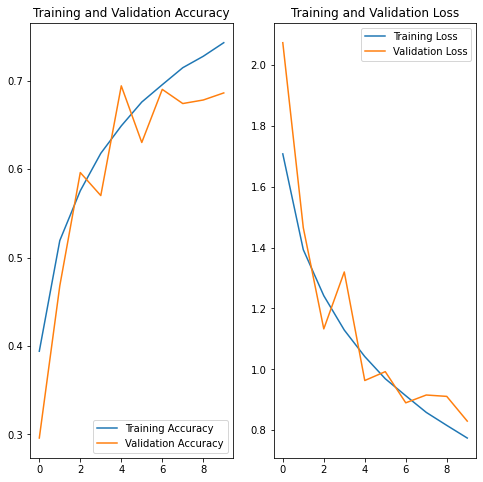

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()